In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/main.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop(columns='customerID',inplace=True)

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(7043,), dtype=object)

In [8]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65], shape=(7043,))

In [9]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [13]:
df.shape

(7043, 20)

In [25]:
df1=df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()==False]

In [26]:
df1.iloc[488].TotalCharges

'74.35'

In [29]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

/tmp/ipykernel_102977/695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [30]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [35]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

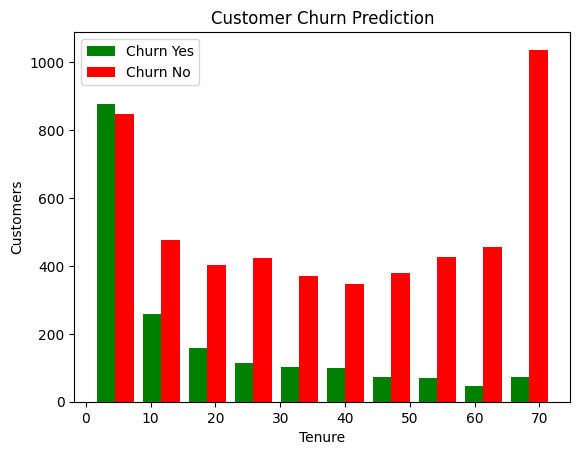

In [47]:
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn Yes','Churn No'])
plt.xlabel('Tenure')
plt.ylabel('Customers')
plt.title('Customer Churn Prediction')
plt.legend()
import os

if(os.path.exists('visualizations')==False):
    os.mkdir('visualizations',)
plt.savefig('visualizations/tenure_churn.png')

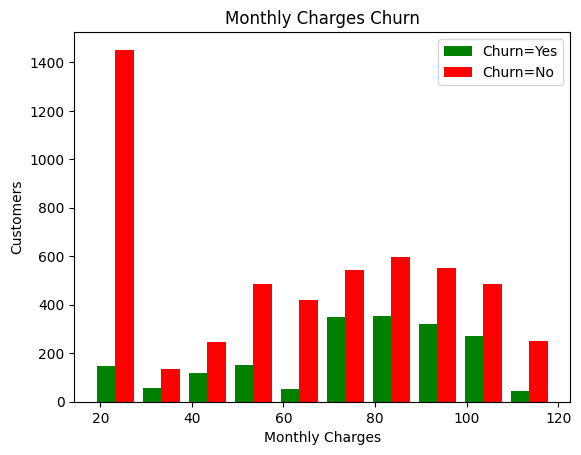

In [46]:
mc_yes = df1[df1.Churn=='Yes'].MonthlyCharges
mc_no = df1[df1.Churn=='No'].MonthlyCharges

plt.hist([mc_yes,mc_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Monthly Charges')
plt.ylabel('Customers')
plt.title('Monthly Charges Churn')

if os.path.exists('visualizations')==False:
    os.mkdir('visualizations')

plt.savefig('visualizations/monthly_charges_churn.png')

plt.legend()

In [52]:
def print_unique_values_of_col(df1):
    for col in df1:
        if df1[col].dtypes=='object':
            print(f"{col}: {df1[col].unique()}")

In [53]:
print_unique_values_of_col(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [56]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/tmp/ipykernel_102977/2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
/tmp/ipykernel_102977/2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [58]:
print_unique_values_of_col(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [59]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [60]:
for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0},inplace=True)

/tmp/ipykernel_102977/4128313914.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1, 'No':0},inplace=True)
/tmp/ipykernel_102977/4128313914.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes':1, 'No':0},inplace=True)
/tmp/ipykernel_102977/4128313914

In [61]:
print_unique_values_of_col(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [62]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

/tmp/ipykernel_102977/698335744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
/tmp/ipykernel_102977/698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [63]:
print_unique_values_of_col(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [71]:
# One hot encoding
df2=pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [72]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5574,1,0,0,0,41,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
4999,1,0,1,1,16,1,0,0,0,0,...,False,False,True,False,False,True,False,False,False,True
2521,0,1,1,0,36,1,1,0,0,0,...,False,True,False,True,False,False,False,True,False,False
3125,0,0,0,0,4,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True


In [73]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [74]:
df2['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7032, dtype: float64

In [77]:
cols_to_scale = ['MonthlyCharges','TotalCharges','tenure']

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [79]:
df2.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3262,1,0,1,1,0.464789,1,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
5079,0,0,0,0,0.197183,1,1,0,1,0,...,False,True,False,True,False,False,False,False,True,False
430,1,0,1,1,0.845070,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True
4649,0,0,1,0,1.000000,1,1,1,1,0,...,False,True,False,False,False,True,False,True,False,False
1835,1,0,1,0,0.000000,1,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
4037,1,0,1,1,0.816901,1,1,0,0,0,...,False,False,True,False,False,True,False,False,False,True
146,0,0,0,0,0.028169,1,0,0,0,0,...,False,False,True,False,True,False,False,False,False,True
3041,0,0,0,1,0.000000,1,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
2929,0,0,0,1,0.549296,0,0,1,1,0,...,True,False,False,False,True,False,False,False,False,True
1170,0,0,1,1,1.000000,1,1,1,1,1,...,False,True,False,False,False,True,False,False,True,False


In [80]:
df2['TotalCharges']

0       0.001275
1       0.215867
2       0.010310
3       0.210241
4       0.015330
          ...   
7038    0.227521
7039    0.847461
7040    0.037809
7041    0.033210
7042    0.787641
Name: TotalCharges, Length: 7032, dtype: float64

In [81]:
df2['MonthlyCharges']

0       0.115423
1       0.385075
2       0.354229
3       0.239303
4       0.521891
          ...   
7038    0.662189
7039    0.845274
7040    0.112935
7041    0.558706
7042    0.869652
Name: MonthlyCharges, Length: 7032, dtype: float64

In [82]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns='Churn')
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
X_train.shape

(5625, 26)

In [84]:
X_test.shape

(1407, 26)

In [85]:
len(X_train.columns)

26

In [89]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    # keras.layers.Dense(15),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=150)

Epoch 1/150


/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7563 - loss: 0.4959
Epoch 2/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.4321
Epoch 3/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8011 - loss: 0.4223
Epoch 4/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8021 - loss: 0.4179
Epoch 5/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8057 - loss: 0.4154
Epoch 6/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8064 - loss: 0.4137
Epoch 7/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8064 - loss: 0.4118
Epoch 8/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8082 - loss: 0.4101
Epoch 9/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8100 - loss: 0.4091
Epoch 10/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8107 - loss: 0.4084
Epoch 11/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8085 - loss: 0.4072
Epoch 12/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [90]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7960 - loss: 0.4608


[0.4607768654823303, 0.7960199117660522]

In [93]:
yp=model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.00140006],
       [0.09039463],
       [0.60875916],
       [0.01939364],
       [0.18724108]], dtype=float32)

In [99]:
y_test[:15]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
2173    0
1291    1
2579    0
6578    0
2515    0
Name: Churn, dtype: int64

In [98]:
y_pred = []
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:15]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

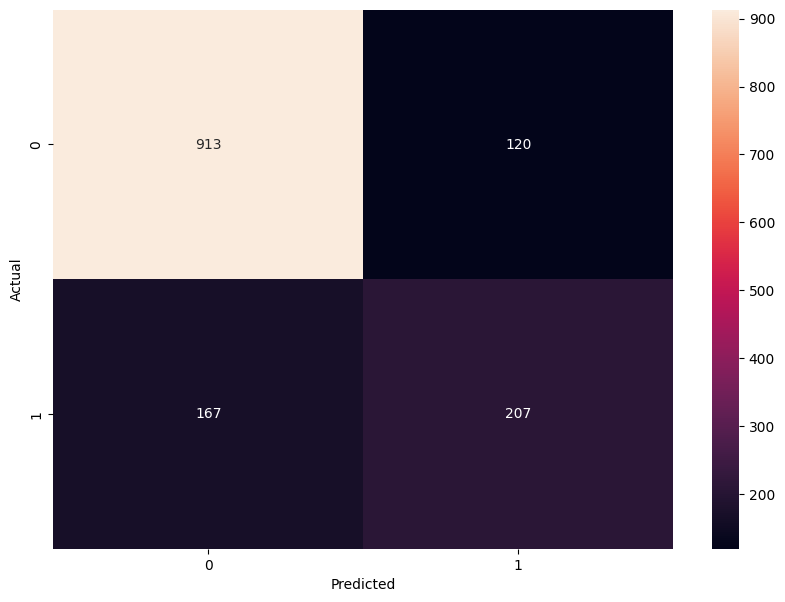

In [102]:
import seaborn as sns 
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

if not os.path.exists('visualizations'):
    os.mkdir('visualizations')

plt.savefig('visualizations/confusion_matrix.png')